# Imports

In [ ]:
import pandas as pd
import numpy as np
import requests as rq
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data

In [ ]:
auber_url = 'https://data.ratp.fr/api/v2/catalog/datasets/qualite-de-lair-mesuree-dans-la-station-auber/exports/json?limit=-1&offset=0&lang=en&timezone=UTC'
chatelet_url = 'https://data.ratp.fr/api/v2/catalog/datasets/qualite-de-lair-mesuree-dans-la-station-chatelet/exports/json?limit=-1&offset=0&lang=en&timezone=UTC'
franklin_url = 'https://data.ratp.fr/api/v2/catalog/datasets/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt/exports/json?limit=-1&offset=0&lang=en&timezone=UTC'

In [ ]:
auber_data = rq.get(auber_url).json()
chatelet_data = rq.get(chatelet_url).json()
franklin_data = rq.get(franklin_url).json()


In [ ]:
auber_df = pd.DataFrame(auber_data)
chatelet_df = pd.DataFrame(chatelet_data)
franklin_df = pd.DataFrame(franklin_data)

# EDA

In [ ]:
#columns with missing values
na_cols = chatelet_df.columns[chatelet_df.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(chatelet_df[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(chatelet_df),2)
mv

,Number_missing,Percentage_missing
nocha4,21329,24.96
n2cha4,13391,15.67
10cha4,12617,14.77
c2cha4,12304,14.40
tcha4,10585,12.39
hycha4,10574,12.38


In [ ]:
#columns with missing values
na_cols = auber_df.columns[auber_df.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(auber_df[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(auber_df),2)
mv

,Number_missing,Percentage_missing
dateheure,8736,10.33
noauba,8736,10.33
n2auba,8736,10.33
10auba,8736,10.33
25auba,8736,10.33
c2auba,8736,10.33
tauba,8736,10.33
hyauba,8736,10.33


In [ ]:
#columns with missing values
na_cols = franklin_df.columns[franklin_df.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(franklin_df[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(franklin_df),2)
mv

,Number_missing,Percentage_missing
nofra1,5179,6.06
n2fra1,4639,5.43
10fra1,2923,3.42
c2fra1,4785,5.60
tfra1,1902,2.23
hyfra1,1909,2.23


[Text(0.5, 1.0, 'Missing Values Chatelet')]

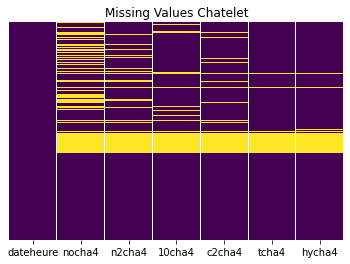

In [ ]:
sns.heatmap(chatelet_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Chatelet")

[Text(0.5, 1.0, 'Missing Values Auber')]

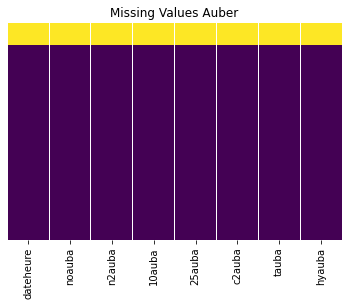

In [ ]:
sns.heatmap(auber_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Auber")

[Text(0.5, 1.0, 'Missing Values Franklin')]

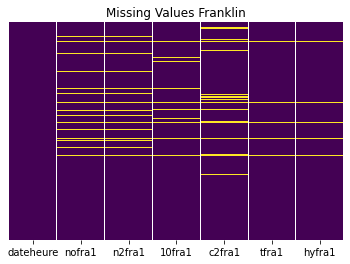

In [ ]:
sns.heatmap(franklin_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Franklin")

In [ ]:
chatelet_df = chatelet_df.replace(',', '.', regex= True)
auber_df = auber_df.replace(',', '.', regex= True)
franklin_df = franklin_df.replace(',', '.', regex= True)

In [ ]:
chatelet_df = chatelet_df.replace('ND', np.nan, regex= True)
auber_df = auber_df.replace('ND', np.nan, regex= True)
franklin_df = franklin_df.replace('ND', np.nan, regex= True)

In [ ]:
chatelet_df = chatelet_df.rename(columns = {'dateheure':'Date_Heure','nocha4':'NO','n2cha4':'NO2','10cha4':'PM10','c2cha4':'CO2','tcha4':'TEMP','hycha4':'HUMI'})
auber_df = auber_df.rename(columns = {'dateheure':'Date_Heure','noauba':'NO','n2auba':'NO2','10auba':'PM10','25auba':'PM25','c2auba':'CO2','tauba':'TEMP','hyauba':'HUMI'})
franklin_df = franklin_df.rename(columns = {'dateheure':'Date_Heure','nofra1':'NO','n2fra1':'NO2','10fra1':'PM10','c2fra1':'CO2','tfra1':'TEMP','hyfra1':'HUMI'})

In [ ]:
auber_df.dropna(thresh=6, inplace=True)
franklin_df.dropna(thresh=5, inplace=True)
chatelet_df.dropna(thresh=5, inplace=True)

In [ ]:
auber_df['Date_Heure'] = pd.to_datetime(auber_df['Date_Heure'], errors='coerce')
chatelet_df['Date_Heure'] = pd.to_datetime(chatelet_df['Date_Heure'], errors='coerce')
franklin_df['Date_Heure'] = pd.to_datetime(franklin_df['Date_Heure'], errors='coerce')
auber_df['Date_Heure'] = auber_df['Date_Heure'].dt.strftime('%Y-%m-%d %H:%M:%S')
chatelet_df['Date_Heure'] = chatelet_df['Date_Heure'].dt.strftime('%Y-%m-%d %H:%M:%S')
franklin_df['Date_Heure'] = franklin_df['Date_Heure'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
chatelet_df = chatelet_df.replace(to_replace=[r'<',r'>'], value='', regex=True)
auber_df = auber_df.replace(to_replace=[r'<',r'>'], value='', regex=True)
franklin_df = franklin_df.replace(to_replace=[r'<',r'>'], value='', regex=True)

In [ ]:
chatelet_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]] = chatelet_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]].apply(pd.to_numeric)
auber_df[["NO",	"NO2",	"PM10","PM25"	,"CO2",	"TEMP",	"HUMI"]] = auber_df[["NO",	"NO2",	"PM10","PM25"	,"CO2",	"TEMP",	"HUMI"]].apply(pd.to_numeric)
franklin_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]] = franklin_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]].apply(pd.to_numeric)

In [ ]:
auber_df['Date_Heure'] = pd.to_datetime(auber_df['Date_Heure'], errors='coerce')
chatelet_df['Date_Heure'] = pd.to_datetime(chatelet_df['Date_Heure'], errors='coerce')
franklin_df['Date_Heure'] = pd.to_datetime(franklin_df['Date_Heure'], errors='coerce')

In [ ]:
# chatelet_df["NO"] = chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour]).transform(lambda x: x.fillna(x.mean()))
chatelet_df['NO'] = chatelet_df['NO'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['NO'].transform('mean'))
chatelet_df['NO2'] = chatelet_df['NO2'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['NO2'].transform('mean'))
chatelet_df['PM10'] = chatelet_df['PM10'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['PM10'].transform('mean'))
chatelet_df['CO2'] = chatelet_df['CO2'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['CO2'].transform('mean'))
chatelet_df['TEMP'] = chatelet_df['TEMP'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['TEMP'].transform('mean'))
chatelet_df['HUMI'] = chatelet_df['HUMI'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['HUMI'].transform('mean'))

[Text(0.5, 1.0, 'Missing Values Chatelet')]

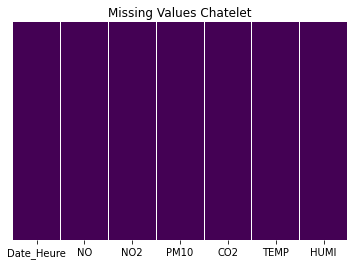

In [ ]:
sns.heatmap(chatelet_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Chatelet")

In [ ]:
# auber_df["NO"] = auber_df.groupby([auber_df['Date_Heure'].dt.hour]).transform(lambda x: x.fillna(x.mean()))
auber_df['NO'] = auber_df['NO'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['NO'].transform('mean'))
auber_df['NO2'] = auber_df['NO2'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['NO2'].transform('mean'))
auber_df['PM10'] = auber_df['PM10'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['PM10'].transform('mean'))
auber_df['PM25'] = auber_df['PM25'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['PM25'].transform('mean'))
auber_df['CO2'] = auber_df['CO2'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['CO2'].transform('mean'))
auber_df['TEMP'] = auber_df['TEMP'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['TEMP'].transform('mean'))
auber_df['HUMI'] = auber_df['HUMI'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['HUMI'].transform('mean'))

[Text(0.5, 1.0, 'Missing Values Auber')]

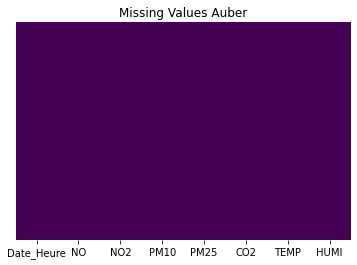

In [ ]:
sns.heatmap(auber_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Auber")

In [ ]:
# franklin_df["NO"] = franklin_df.groupby([franklin_df['Date_Heure'].dt.hour]).transform(lambda x: x.fillna(x.mean()))
franklin_df['NO'] = franklin_df['NO'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['NO'].transform('mean'))
franklin_df['NO2'] = franklin_df['NO2'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['NO2'].transform('mean'))
franklin_df['PM10'] = franklin_df['PM10'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['PM10'].transform('mean'))
franklin_df['CO2'] = franklin_df['CO2'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['CO2'].transform('mean'))
franklin_df['TEMP'] = franklin_df['TEMP'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['TEMP'].transform('mean'))
franklin_df['HUMI'] = franklin_df['HUMI'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['HUMI'].transform('mean'))

[Text(0.5, 1.0, 'Missing Values Franklin')]

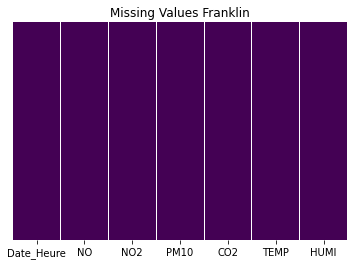

In [ ]:
sns.heatmap(franklin_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Franklin")

In [ ]:
franklin_df['hour'] = franklin_df['Date_Heure'].apply(lambda x: x.hour)
franklin_df['weekday'] = franklin_df['Date_Heure'].apply(lambda x: x.weekday())
franklin_df['month'] = franklin_df['Date_Heure'].apply(lambda x: x.month)
franklin_df['year'] = franklin_df['Date_Heure'].apply(lambda x: x.year)
auber_df['hour'] = auber_df['Date_Heure'].apply(lambda x: x.hour)
auber_df['weekday'] = auber_df['Date_Heure'].apply(lambda x: x.weekday())
auber_df['month'] = auber_df['Date_Heure'].apply(lambda x: x.month)
auber_df['year'] = auber_df['Date_Heure'].apply(lambda x: x.year)
chatelet_df['hour'] = chatelet_df['Date_Heure'].apply(lambda x: x.hour)
chatelet_df['weekday'] = chatelet_df['Date_Heure'].apply(lambda x: x.weekday())
chatelet_df['month'] = chatelet_df['Date_Heure'].apply(lambda x: x.month)
chatelet_df['year'] = chatelet_df['Date_Heure'].apply(lambda x: x.year)
chatelet_df

,Date_Heure,NO,NO2,PM10,CO2,TEMP,HUMI,hour,weekday,month,year
0,2013-01-01 06:00:00,3.000000,26.000000,146.0,563.0,20.9,46.0,6,1,1,2013
1,2013-01-01 09:00:00,7.000000,31.000000,128.0,517.0,20.9,45.2,9,1,1,2013
2,2013-01-01 14:00:00,16.000000,41.000000,164.0,653.0,21.0,36.6,14,1,1,2013
3,2013-01-01 19:00:00,41.000000,62.000000,180.0,689.0,21.0,38.0,19,1,1,2013
4,2013-01-02 04:00:00,2.000000,28.000000,6.0,461.0,18.7,37.4,4,2,1,2013
...,...,...,...,...,...,...,...,...,...,...,...
85432,2022-10-09 06:00:00,19.347024,28.921234,5.0,437.0,17.2,42.9,6,6,10,2022
85433,2022-10-09 13:00:00,22.614840,35.675082,29.0,564.0,18.0,44.7,13,6,10,2022
85434,2022-10-09 15:00:00,20.103809,34.873580,43.0,578.0,18.5,43.7,15,6,10,2022
85435,2022-10-09 18:00:00,20.257613,35.894376,65.0,637.0,19.5,43.5,18,6,10,2022


(0.0, 2500.0)

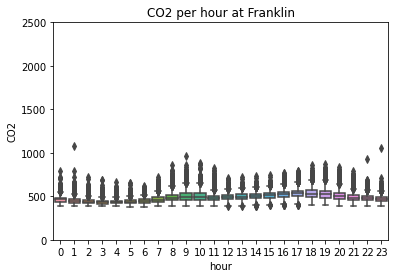

In [ ]:
sns.boxplot(data=franklin_df,x='hour',y='CO2').set_title('CO2 per hour at Franklin')
plt.ylim(0, 2500)

(0.0, 2500.0)

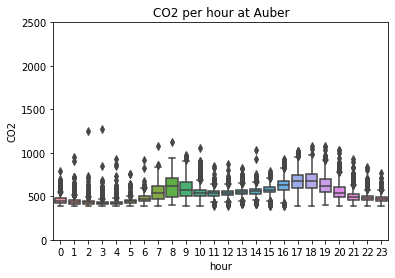

In [ ]:
sns.boxplot(data=auber_df,x='hour',y='CO2').set_title('CO2 per hour at Auber')
plt.ylim(0, 2500)

(0.0, 2500.0)

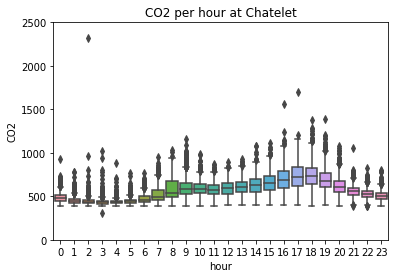

In [ ]:
sns.boxplot(data=chatelet_df,x='hour',y='CO2').set_title('CO2 per hour at Chatelet')
plt.ylim(0, 2500)

(0.0, 2500.0)

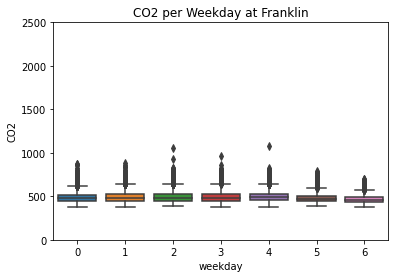

In [ ]:
sns.boxplot(data=franklin_df,x='weekday',y='CO2').set_title('CO2 per Weekday at Franklin')
plt.ylim(0, 2500)

(0.0, 2500.0)

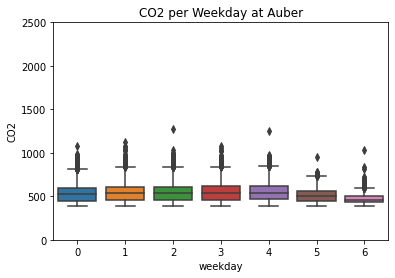

In [ ]:
sns.boxplot(data=auber_df,x='weekday',y='CO2').set_title('CO2 per Weekday at Auber')
plt.ylim(0, 2500)

(0.0, 2500.0)

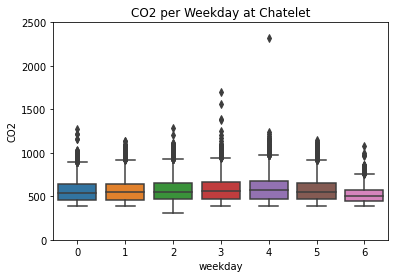

In [ ]:
sns.boxplot(data=chatelet_df,x='weekday',y='CO2').set_title('CO2 per Weekday at Chatelet')
plt.ylim(0, 2500)

(0.0, 2000.0)

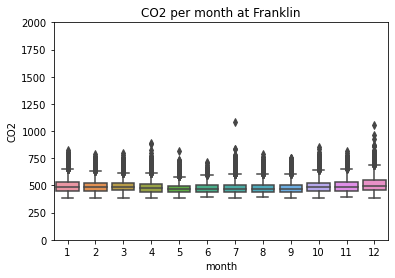

In [ ]:
sns.boxplot(data=franklin_df,x='month',y='CO2').set_title('CO2 per month at Franklin')
plt.ylim(0, 2000)

(0.0, 2000.0)

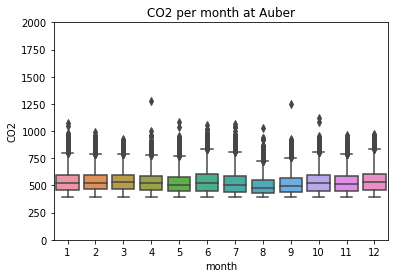

In [ ]:
sns.boxplot(data=auber_df,x='month',y='CO2').set_title('CO2 per month at Auber')
plt.ylim(0, 2000)

(0.0, 2000.0)

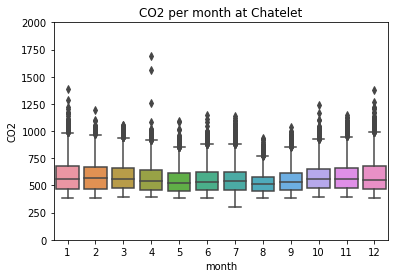

In [ ]:
sns.boxplot(data=chatelet_df,x='month',y='CO2').set_title('CO2 per month at Chatelet')
plt.ylim(0, 2000)

(0.0, 2500.0)

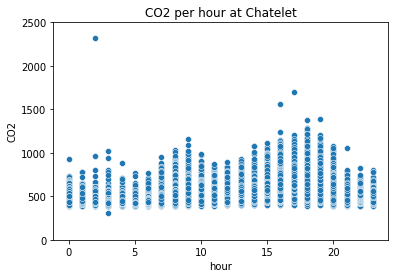

In [ ]:
sns.scatterplot(data=chatelet_df,x='hour',y='CO2').set_title('CO2 per hour at Chatelet')
plt.ylim(0, 2500)

(0.0, 2500.0)

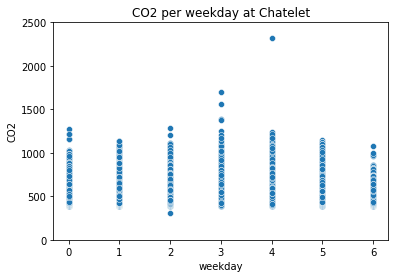

In [ ]:
sns.scatterplot(data=chatelet_df,x='weekday',y='CO2').set_title('CO2 per weekday at Chatelet')
plt.ylim(0, 2500)

(0.0, 2500.0)

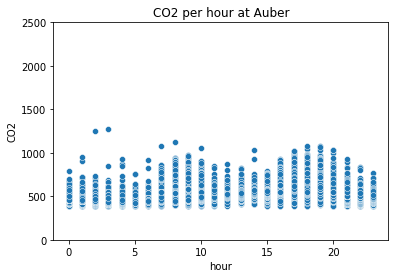

In [ ]:
sns.scatterplot(data=auber_df,x='hour',y='CO2').set_title('CO2 per hour at Auber')
plt.ylim(0, 2500)

(0.0, 2500.0)

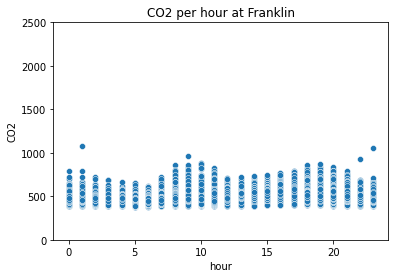

In [ ]:
sns.scatterplot(data=franklin_df,x='hour',y='CO2').set_title('CO2 per hour at Franklin')
plt.ylim(0, 2500)

# ML Imports

In [ ]:
import statsmodels.api as sm
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
X = chatelet_df[['hour','CO2']]
X

,hour,CO2
0,6,563.0
1,9,517.0
2,14,653.0
3,19,689.0
4,4,461.0
...,...,...
85432,6,437.0
85433,13,564.0
85434,15,578.0
85435,18,637.0


# K Means Clustering

Text(0, 0.5, 'WCSS')

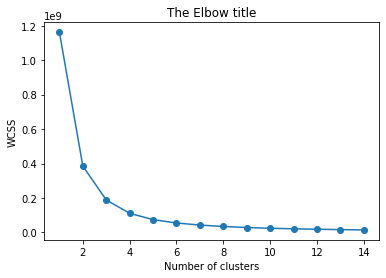

In [ ]:
wcss=[]
for i in range(1,15):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss,'-o')
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 4, ..., 4, 4, 0], dtype=int32)

Text(0, 0.5, 'CO2 Level')

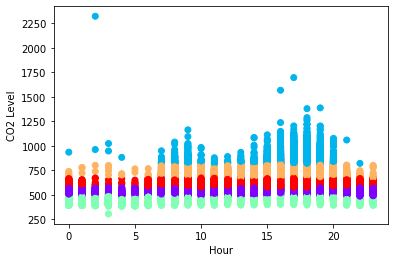

In [ ]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['hour'],data_with_clusters['CO2'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Hour')
plt.ylabel('CO2 Level')

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 14)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

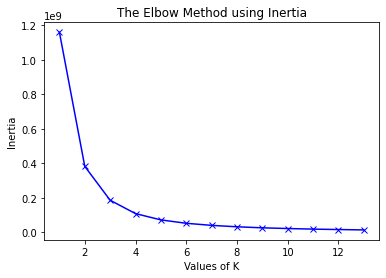

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

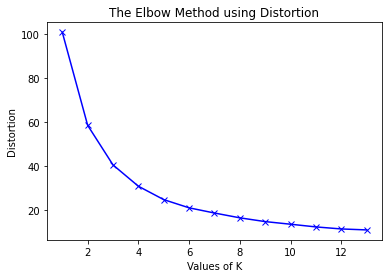

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6055196615118683
For n_clusters = 3 The average silhouette_score is : 0.5750425641413075
For n_clusters = 4 The average silhouette_score is : 0.5649396148277538
For n_clusters = 5 The average silhouette_score is : 0.5500835528961857
For n_clusters = 6 The average silhouette_score is : 0.5362777200407142
For n_clusters = 7 The average silhouette_score is : 0.5255716790682584


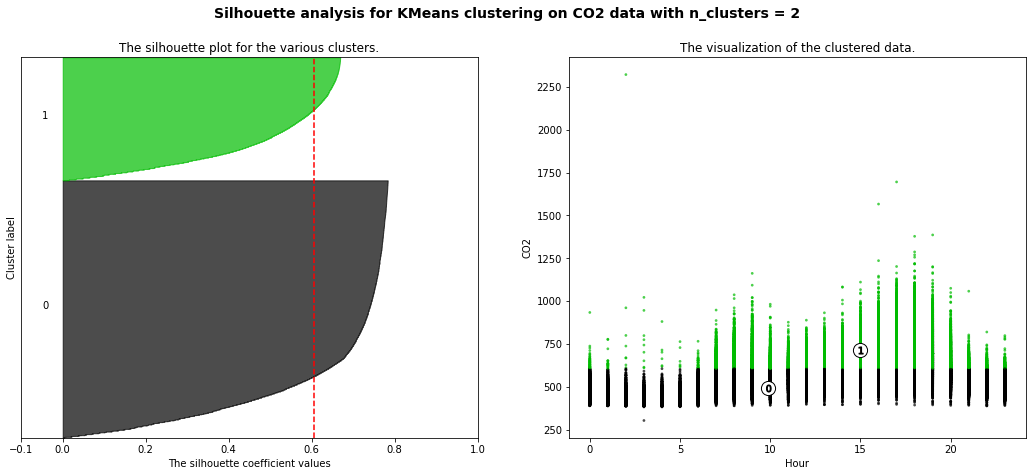

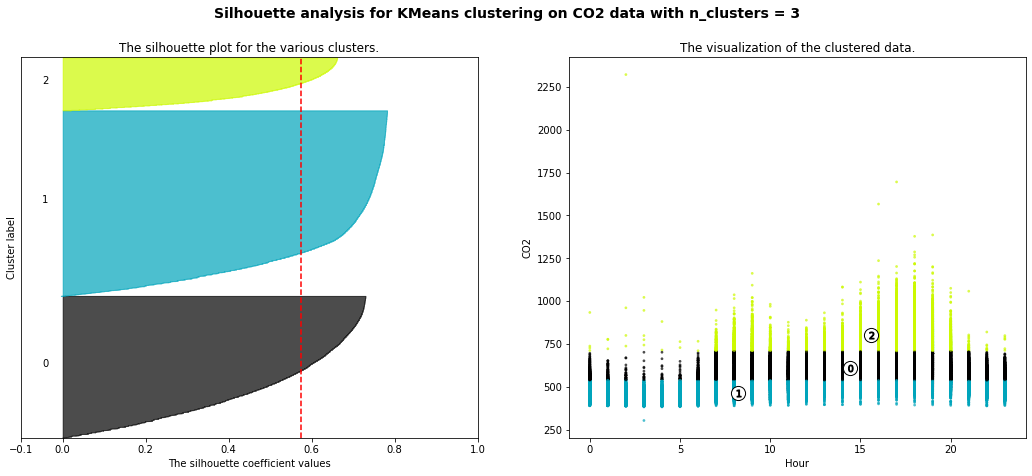

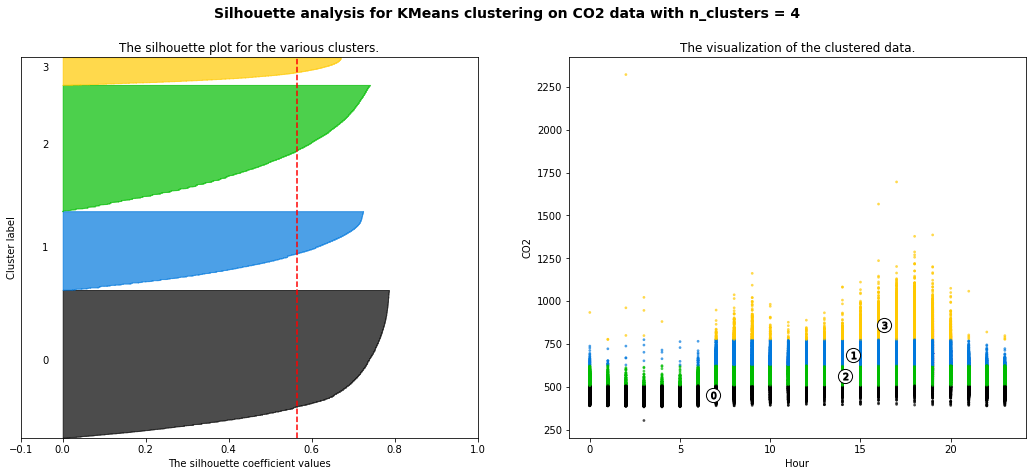

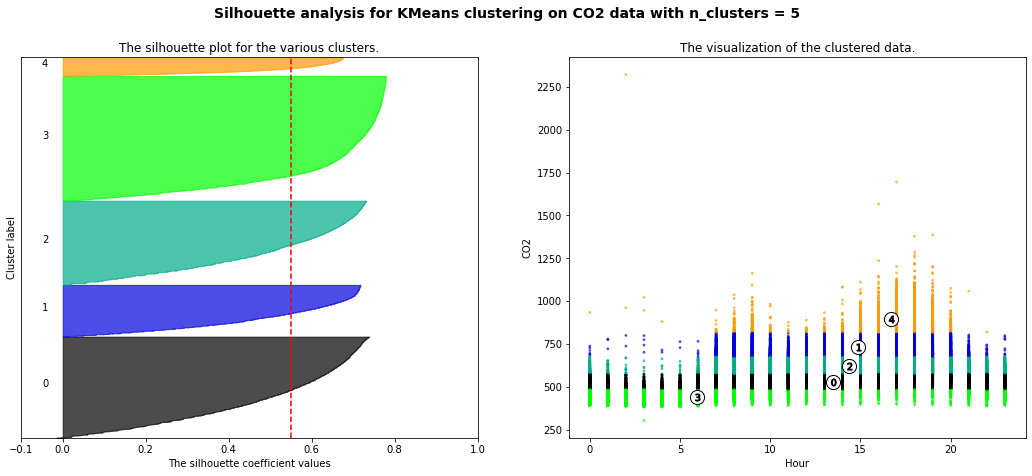

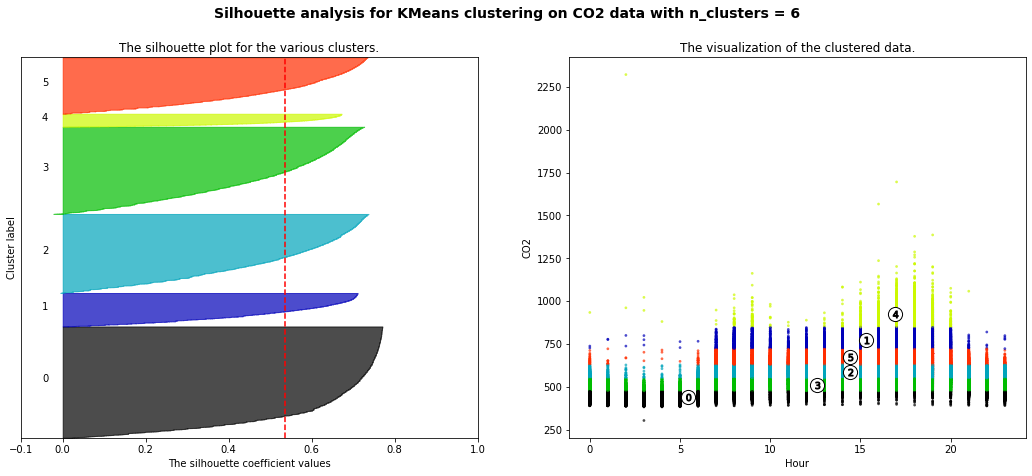

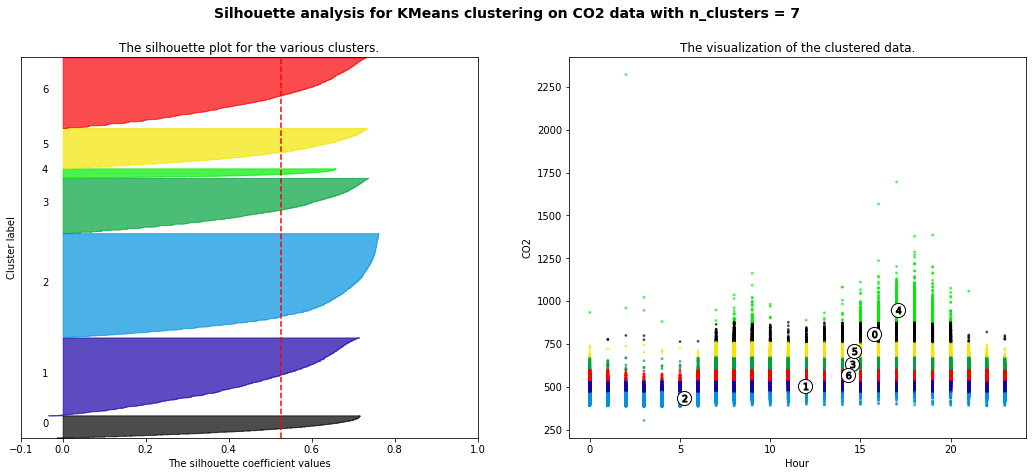

In [ ]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Hour")
    ax2.set_ylabel("CO2")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on CO2 data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

se = [] 
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

With in sum of squared error (WCSS) at K = 2 : 385172329.807932
Silhouette Coefficient: 0.605
Calinski-Harabasz Index: 145909.629
Davies-Bouldin Index: 0.572
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 188855794.62862548
Silhouette Coefficient: 0.575
Calinski-Harabasz Index: 186395.820
Davies-Bouldin Index: 0.546
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 111205577.04419792
Silhouette Coefficient: 0.565
Calinski-Harabasz Index: 227867.500
Davies-Bouldin Index: 0.529
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 74725159.70360087
Silhouette Coefficient: 0.550
Calinski-Harabasz Index: 263161.865
Davies-Bouldin Index: 0.529
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 6 : 55079106.66344842
Silhouette Coefficient: 0.538
Calinski-Har

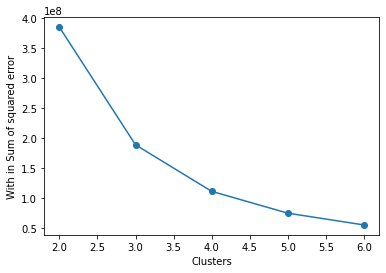

In [ ]:
plt.plot(index, se, marker='o')
plt.xlabel('Clusters')
plt.ylabel('With in Sum of squared error')
plt.show()

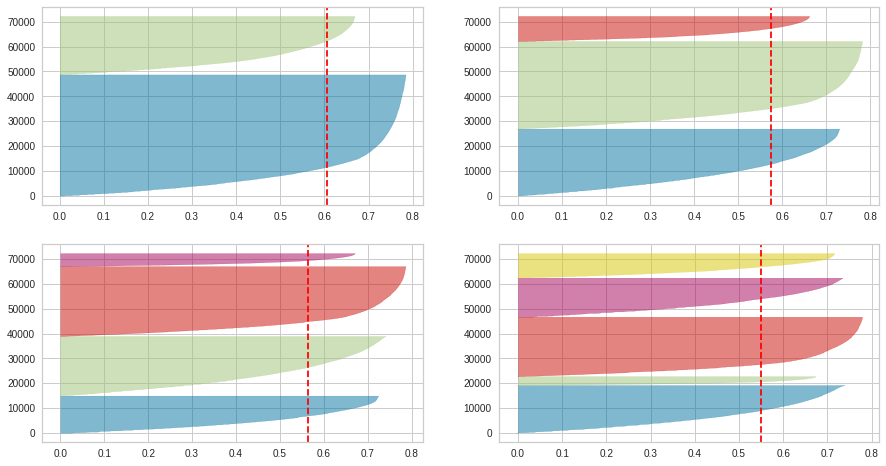

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.550


NameError: ignored

In [ ]:
X['labels']=labels

In [ ]:
data = pd.merge(X,X['labels'],how='left',left_index=True,right_index=True)

# Clustering Weekdays

In [ ]:
X = chatelet_df[['weekday','CO2']]

For n_clusters = 2 The average silhouette_score is : 0.6092802943979634
For n_clusters = 3 The average silhouette_score is : 0.5814455687107984
For n_clusters = 4 The average silhouette_score is : 0.5738206588107219
For n_clusters = 5 The average silhouette_score is : 0.5631533911848855
For n_clusters = 6 The average silhouette_score is : 0.5535919874783879
For n_clusters = 7 The average silhouette_score is : 0.5446594595871003


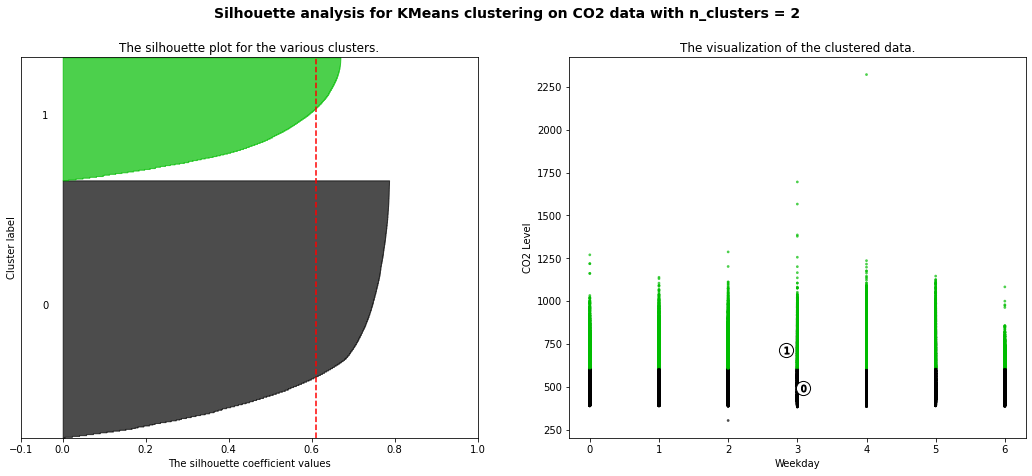

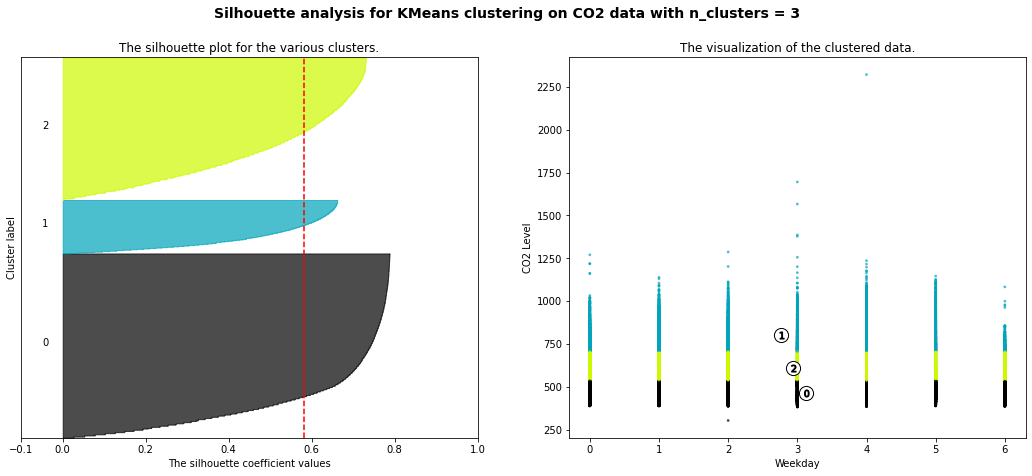

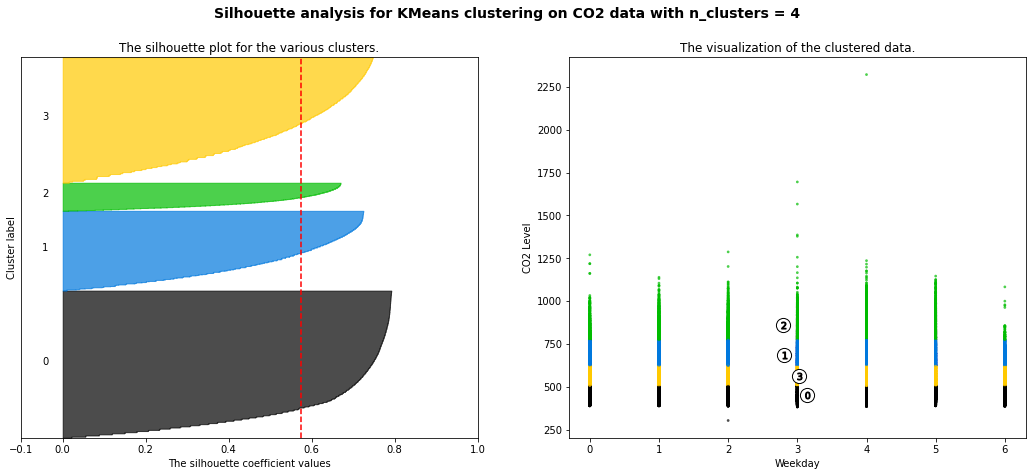

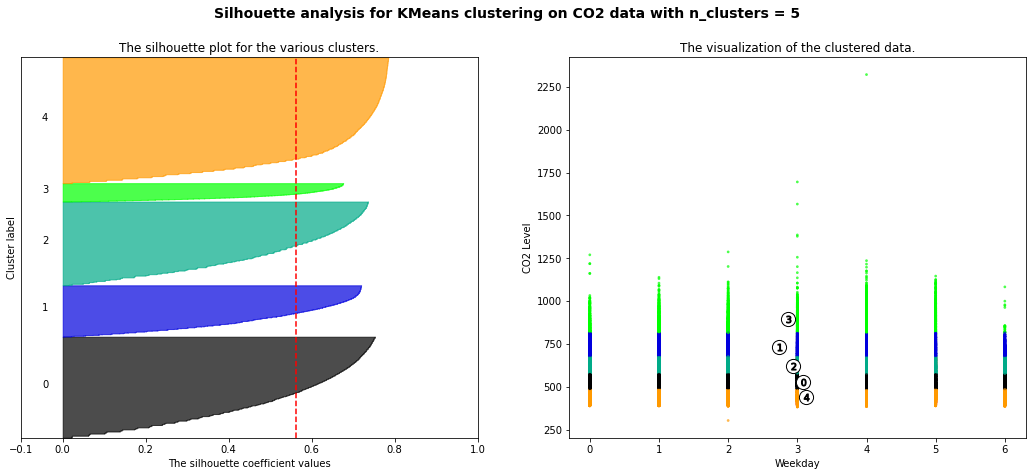

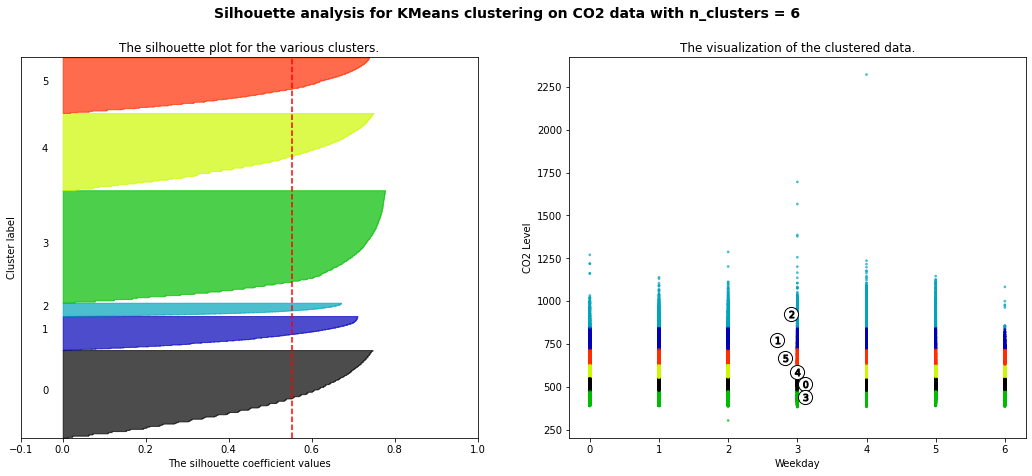

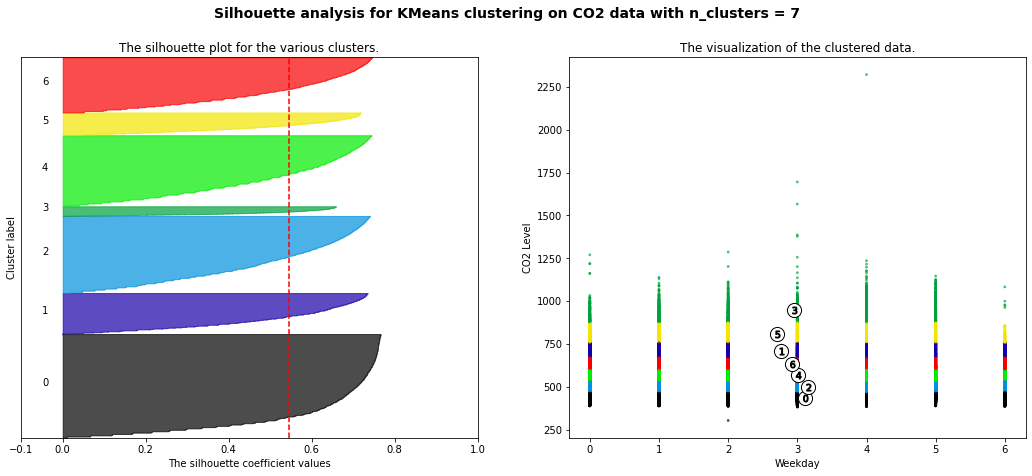

In [ ]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Weekday")
    ax2.set_ylabel("CO2 Level")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on CO2 data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Text(0, 0.5, 'WCSS')

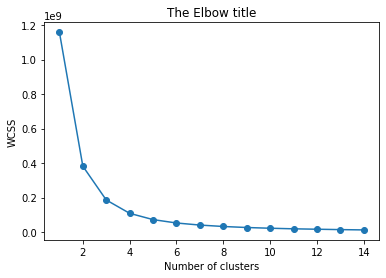

In [ ]:
# X = chatelet_df[['weekday','CO2']]
wcss=[]
for i in range(1,15):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss,'-o')
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([3, 3, 2, ..., 0, 3, 2], dtype=int32)

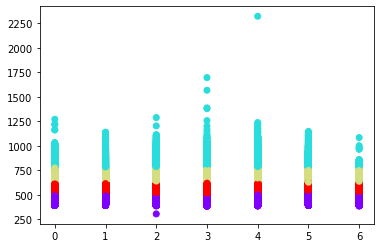

In [ ]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['weekday'],data_with_clusters['CO2'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

se = [] 
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

With in sum of squared error (WCSS) at K = 2 : 382429519.5226708
Silhouette Coefficient: 0.609
Calinski-Harabasz Index: 146882.296
Davies-Bouldin Index: 0.566
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 186456137.15247905
Silhouette Coefficient: 0.581
Calinski-Harabasz Index: 188652.975
Davies-Bouldin Index: 0.541
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 109055259.33913958
Silhouette Coefficient: 0.574
Calinski-Harabasz Index: 232134.384
Davies-Bouldin Index: 0.523
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 72678726.68720078
Silhouette Coefficient: 0.563
Calinski-Harabasz Index: 270290.111
Davies-Bouldin Index: 0.514
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 6 : 53045634.54076482
Silhouette Coefficient: 0.554
Calinski-Ha

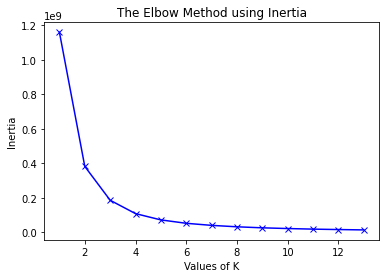

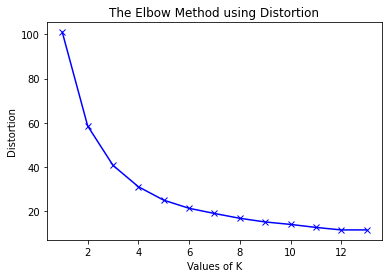

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 14)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()